# NETFLIX CASE STUDY: 🎥
Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.


# OBJECTIVE:
Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries


# Import Required Libraries ⏬

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# How the Dataset Looks 🌱

In [ ]:
data1=pd.read_csv('netflix.csv')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


There are total of 8807 rows and 12 columns with respective data types

# Data Preprocessing ⛹
* Looking for Null Values in Categorical and Continuous Variables and filling it up with appropriate Values
* Changing to appropriate data type
* Un-nesting the columns with comma separated values (Split / Explode)





In [ ]:
ratingmode = data1['rating'].mode()[0]
data1['rating'].fillna(ratingmode, inplace=True)

In [ ]:
moviemode=data1[data1['type']=='Movie']['duration'].mode()[0]
tvmode=data1[data1['type']=='TV Show']['duration'].mode()[0]


In [ ]:
data1.loc[(data1['type']=='Movie') & (data1['duration'].isna()), 'duration']=moviemode
data1.loc[(data1['type']=='TV Show') & (data1['duration'].isna()), 'duration']=tvmode

In [ ]:
datemode=data1['date_added'].mode()[0]
data1['date_added'].fillna(datemode,inplace = True)

In [ ]:
data1['date_added']=pd.to_datetime(data1['date_added'])

In [ ]:
# checking what all columns have got comma separated strings then split and explode accordingly for analysis
data1['director'].str.contains(',').any()

True

In [ ]:
data1['rating'].str.contains(",").any()

False

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   show_id                8807 non-null   object        
 1   type                   8807 non-null   object        
 2   title                  8807 non-null   object        
 3   director               6173 non-null   object        
 4   cast                   7982 non-null   object        
 5   country                7976 non-null   object        
 6   date_added             8807 non-null   datetime64[ns]
 7   release_year           8807 non-null   int64         
 8   rating                 8807 non-null   object        
 9   duration               8807 non-null   object        
 10  listed_in              8807 non-null   object        
 11  description            8807 non-null   object        
 12  Year of Content Added  8807 non-null   int64         
 13  Yea

In [ ]:
data2=data1

In [ ]:
dflist=data2[['title','listed_in']]

In [ ]:
dflist['listed_in'] = dflist['listed_in'].apply(lambda x: x.split(', '))


<ipython-input-403-1d72a43dff66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dflist['listed_in'] = dflist['listed_in'].apply(lambda x: x.split(', '))


In [ ]:
dflist = dflist.explode('listed_in').reset_index(drop=True)

In [ ]:
df1=data2.merge(dflist,on='title')

In [ ]:
df1.drop(['listed_in_x','description'],axis=1,inplace=True)

In [ ]:
dfcountry=data2[['title','country']]

In [ ]:
dfcountry['country']=dfcountry['country'].apply(lambda x: x.split(', ') if pd.notna(x) else x)

<ipython-input-408-b0ee391fcdba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcountry['country']=dfcountry['country'].apply(lambda x: x.split(', ') if pd.notna(x) else x)


In [ ]:
dfcountry=dfcountry.explode('country').reset_index(drop=True)

In [ ]:
dfcountry['country'].fillna('Unknown', inplace=True)

In [ ]:
df12=df1.merge(dfcountry,on='title')

In [ ]:
df12.drop('country_x',axis=1,inplace=True)

In [ ]:
dfdir=data2[['title','director']]

In [ ]:
dfdir['director']=dfdir['director'].apply(lambda x: x.split(',') if pd.notna(x) else x)

<ipython-input-414-bef0c702c615>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdir['director']=dfdir['director'].apply(lambda x: x.split(',') if pd.notna(x) else x)


In [ ]:
dfdir=dfdir.explode('director').reset_index(drop=True)

In [ ]:
dfdir['director'].fillna('Unknown',inplace=True)

In [ ]:
df123=df12.merge(dfdir,on='title')

In [ ]:
df123.drop('director_x',axis=1,inplace=True)

In [ ]:
dfcast=data2[['title','cast']]

In [ ]:
dfcast['cast']=dfcast['cast'].apply(lambda x: x.split(',') if pd.notna(x) else x)

<ipython-input-420-ca7baedf77bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcast['cast']=dfcast['cast'].apply(lambda x: x.split(',') if pd.notna(x) else x)


In [ ]:
dfcast=dfcast.explode('cast').reset_index(drop=True)

In [ ]:
dfcast['cast'].fillna('Unknown Actor',inplace=True)

In [ ]:
df1234=df123.merge(dfcast,on='title')

In [ ]:
df1234.drop("cast_x",axis=1,inplace=True)

In [ ]:
newnames= {'listed_in_y': 'Listed_In', 'country_y': 'Country', 'cast_y': 'Cast', 'director_y': 'Director','show_id':'Show_ID',
           'type': 'Type', 'title': 'Title', 'date_added': 'Date_Added', 'release_year': 'Release_Year','rating': 'Rating',
           'duration': 'Duration'}
df1234.rename(columns=newnames,inplace=True)

In [ ]:
df1234[['duration_number', 'duration_unit']] = df1234['Duration'].str.extract('(\d+) (\w+)')
df1234['duration_number'] = pd.to_numeric(df1234['duration_number'])

In [ ]:
df1234.drop(['duration_unit','Duration'],axis=1,inplace=True)

In [ ]:
df1234.rename(columns={'duration_number':'Duration'},inplace=True)

In [ ]:
df1234['Rating']=df1234['Rating'].str.replace(r'\d+ min', 'unknown', regex=True)

In [ ]:
df1234['Release_Year']=pd.to_datetime(df1234['Release_Year'],format='%Y').dt.year

In [ ]:
finaldf=df1234

In [ ]:
finaldf

,Show_ID,Type,Title,Date_Added,Release_Year,Rating,Listed_In,Country,Director,Cast,Duration,Added_Year
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,Documentaries,United States,Kirsten Johnson,Unknown Actor,90,2021
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,International TV Shows,South Africa,Unknown,Ama Qamata,2,2021
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,International TV Shows,South Africa,Unknown,Khosi Ngema,2,2021
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,International TV Shows,South Africa,Unknown,Gail Mabalane,2,2021
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,International TV Shows,South Africa,Unknown,Thabang Molaba,2,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,Music & Musicals,India,Mozez Singh,Manish Chaudhary,111,2019
201987,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,Music & Musicals,India,Mozez Singh,Meghna Malik,111,2019
201988,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,Music & Musicals,India,Mozez Singh,Malkeet Rauni,111,2019
201989,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,Music & Musicals,India,Mozez Singh,Anita Shabdish,111,2019


In [ ]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 201990
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Show_ID       201991 non-null  object        
 1   Type          201991 non-null  object        
 2   Title         201991 non-null  object        
 3   Date_Added    201991 non-null  datetime64[ns]
 4   Release_Year  201991 non-null  int64         
 5   Rating        201991 non-null  object        
 6   Listed_In     201991 non-null  object        
 7   Country       201991 non-null  object        
 8   Director      201991 non-null  object        
 9   Cast          201991 non-null  object        
 10  Duration      201991 non-null  int64         
 11  Added_Year    201991 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 20.0+ MB


# Know Our Data ⛳
Data Summary:
* 8807 unique shows:- *6131 Movies(about 70%) and 2676 TV Shows*
* 127 Countries:- *Maximum Content coming from US followed by India and UK*
* 5120 Directors:- *'Rajiv Chilaka' followed by 'Raul Campos' and 'Jan Suter'*
* 39297 Actors:- *'Anupam Kher' followed by 'Rupa Bhimani' and 'Takahiro Sakurai'*
* 15 Ratings:- *Maximum Rating is 'TV-MA' followed by 'TV-14' and 'TV-PG'*
* 42 Genres:- *Top is 'International Movies' followed by 'Dramas' and 'Comedies'*
* 100 minutes:- *Average Movie Duration*
* 2 Seasons:- *Average No. of Seasons for TV Shows*
* Maximum Movies and TV Shows got added to the platform in 2019 followed by 2020
* Maximum Content got released in 2018 followed by 2017 which later got added to
  platform






In [ ]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 201990
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Show_ID       201991 non-null  object        
 1   Type          201991 non-null  object        
 2   Title         201991 non-null  object        
 3   Date_Added    201991 non-null  datetime64[ns]
 4   Release_Year  201991 non-null  int64         
 5   Rating        201991 non-null  object        
 6   Listed_In     201991 non-null  object        
 7   Country       201991 non-null  object        
 8   Director      201991 non-null  object        
 9   Cast          201991 non-null  object        
 10  Duration      201991 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 18.5+ MB


In [ ]:
finaldf.head()

,Show_ID,Type,Title,Date_Added,Release_Year,Rating,Listed_In,Country,Director,Cast,Duration
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,Documentaries,United States,Kirsten Johnson,Unknown Actor,90
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,International TV Shows,South Africa,Unknown,Ama Qamata,2
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,International TV Shows,South Africa,Unknown,Khosi Ngema,2
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,International TV Shows,South Africa,Unknown,Gail Mabalane,2
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,International TV Shows,South Africa,Unknown,Thabang Molaba,2


🎯 **Type**:

Clearly shows Movies with total 6131 form almost 70% of the content with 30% remaining with TV Shows with count 2676

In [ ]:
dftype=finaldf.groupby('Type')['Title'].nunique()

In [ ]:
dftype

Type
Movie      6131
TV Show    2676
Name: Title, dtype: int64

In [ ]:
# Movies Share
dftype[0]*100/(dftype[0]+dftype[1])

69.61507891449983

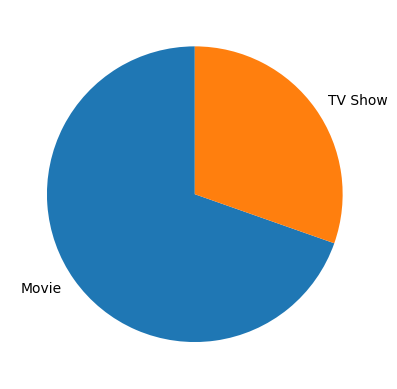

In [ ]:
plt.pie(dftype,labels=dftype.index,startangle=90)
plt.show()


🎯 **Title**:

There are unique 8807 titles including Movies and TV showsin the dataset

In [ ]:
finaldf['Title'].nunique()

8807

🎯 **Date Added**:

Most of the content got added in the year 2019 (2016) followed by 2020 (1889). The numbers and timing infers that it may largely be due to pandemic during that time.
Some Outliers can be observed inferring Netflix starting adding content in 2008.

In [ ]:
dyear=finaldf.groupby(finaldf['Date_Added'].dt.year)['Title'].nunique().sort_values(ascending=False)

In [ ]:
dyear

Date_Added
2019    2016
2020    1889
2018    1649
2021    1498
2017    1188
2016     429
2015      82
2014      24
2011      13
2013      11
2012       3
2008       2
2009       2
2010       1
Name: Title, dtype: int64

In [ ]:
#Taking previous dataset into account for this graphical representation
data8=data2
data8['Year of Content Added']=data8['date_added'].dt.year

(array([0]), [Text(0, 0, '')])

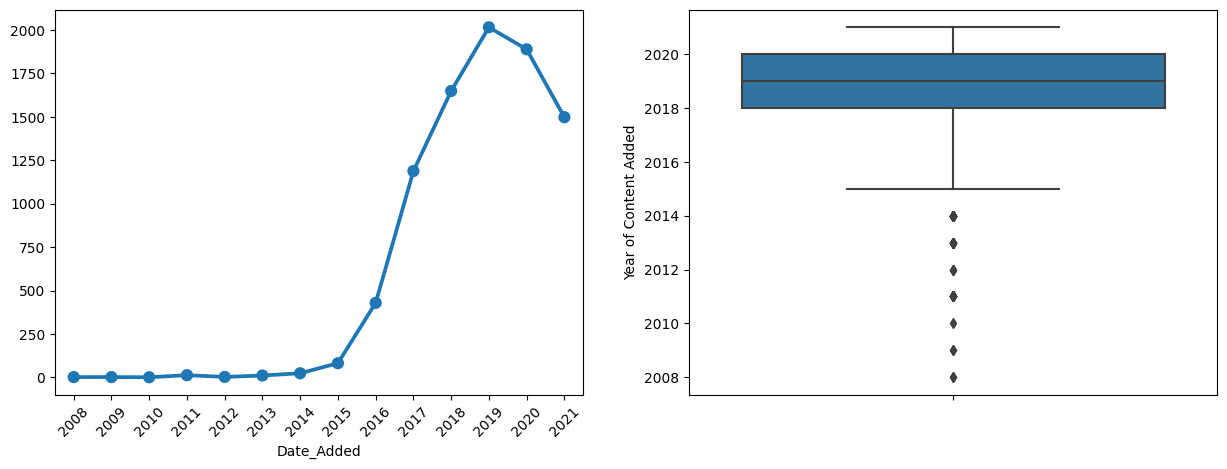

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.pointplot(x=dyear.index,y=dyear.values)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.boxplot(y=data8['Year of Content Added'])
plt.xticks(rotation=45)


 🎯**Release Year**:

Most of the Movies / shows in the dataset got released in 2018 followed by 2017. Since most of the shows got added in 2019 in the platform, so most of them got added were from these released years.

Some Outliers clearly show the movies released as early as 1925.

In [ ]:
dfrelyear=finaldf.groupby('Release_Year')['Title'].nunique().sort_values(ascending=False)

In [ ]:
dfrelyear

Release_Year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1961       1
1947       1
1966       1
1925       1
Name: Title, Length: 74, dtype: int64

In [ ]:
data8['Year of Release']=data8['release_year']

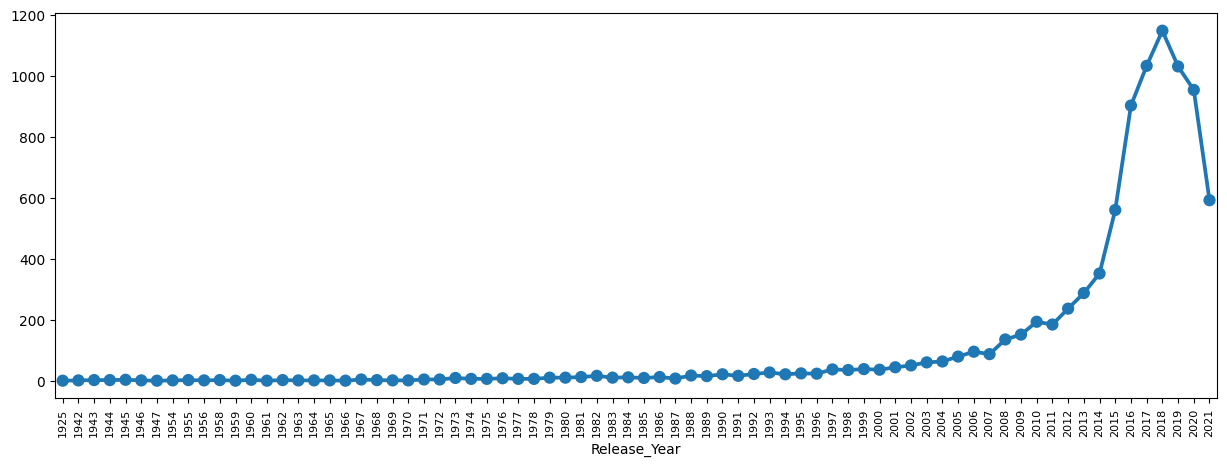

In [ ]:
plt.figure(figsize=(15,5))
sns.pointplot(x=dfrelyear.index,y=dfrelyear.values)
plt.xticks(rotation=90,fontsize=8)
plt.show()


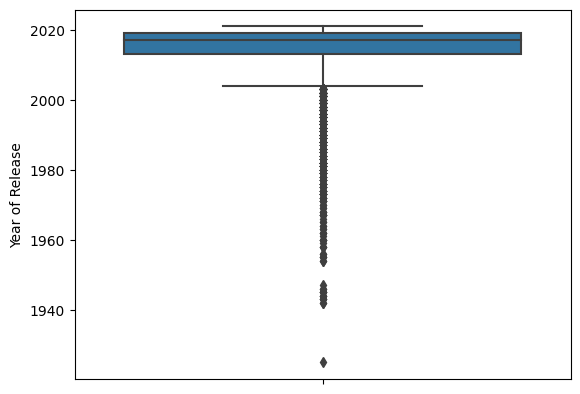

In [ ]:
sns.boxplot(y=data8['Year of Release'])
plt.xticks(rotation=45)
plt.show()

🎯 **Rating**:

Maximum Rating is 'TV-MA' followed by 'TV-14' and 'TV-PG'.

It infers that most of the content on Netflix is for adults only or need parental guidance for viewers below 17 years of age

In [ ]:
finaldf['Rating'].nunique()

15

In [ ]:
dfrating=finaldf.groupby('Rating')['Title'].nunique().sort_values(ascending=False)
dfrating

Rating
TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
unknown        3
Name: Title, dtype: int64

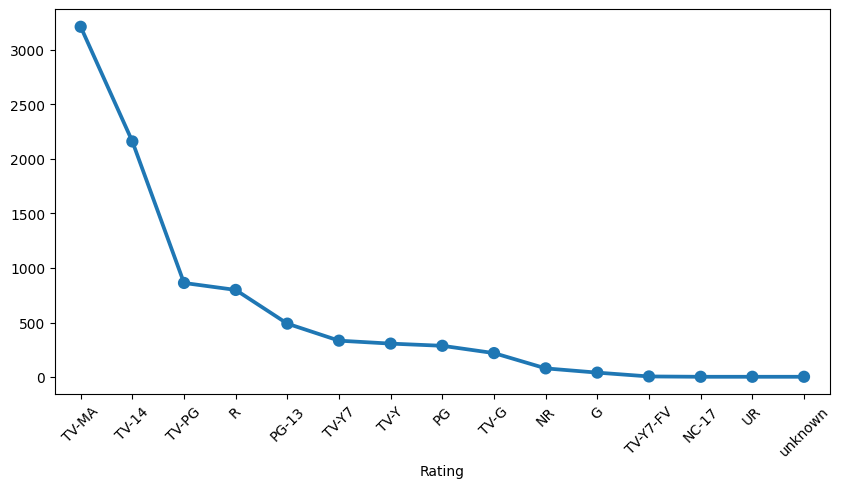

In [ ]:
plt.figure(figsize=(10,5))
sns.pointplot(x=dfrating.index,y=dfrating.values)
plt.xticks(rotation=45)
plt.show()

🎯 **Listed_In / Genre**:

42 Genres: Top Genre is 'International Movies' followed by 'Dramas' and 'Comedies'

In [ ]:
dflisted=finaldf.groupby('Listed_In')['Title'].nunique().sort_values(ascending=False)
dflisted

Listed_In
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows             

In [ ]:
finaldf['Listed_In'].nunique()

42

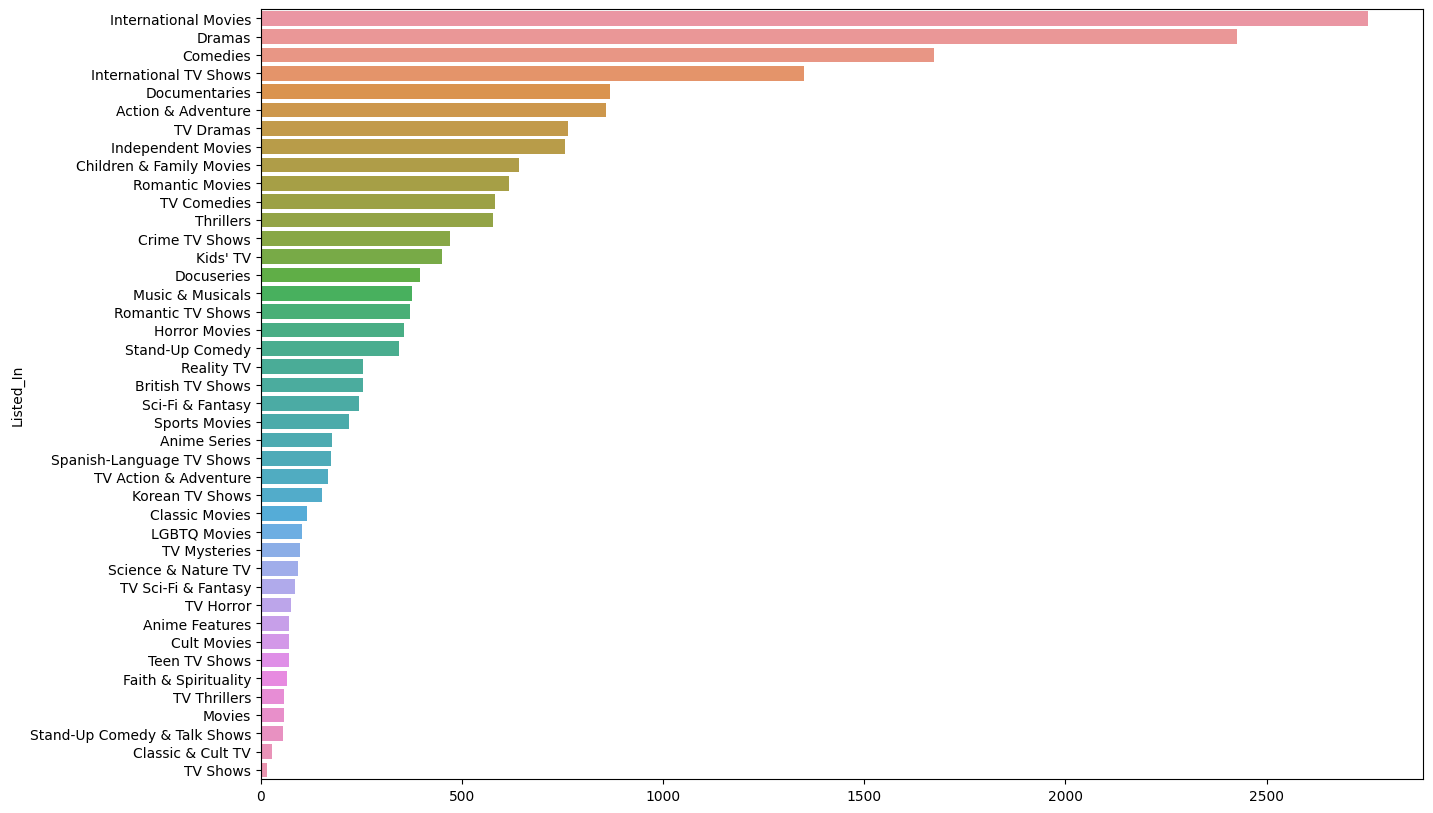

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(y=dflisted.index,x=dflisted.values)
plt.show()


🎯 **Country** :

128 Countries: Maximum Content produced from US followed by India and UK

In [ ]:
finaldf['Country'].nunique()

128

In [ ]:
dfc=finaldf.groupby('Country')['Title'].nunique().sort_values(ascending=False)
dfc

Country
United States     3689
India             1046
Unknown            831
United Kingdom     804
Canada             445
                  ... 
Somalia              1
Mongolia             1
Ecuador              1
East Germany         1
Ethiopia             1
Name: Title, Length: 128, dtype: int64

In [ ]:
dfcdf=pd.DataFrame(dfc).reset_index()

In [ ]:
# Removing 'Unknown' from Graphical Representation
dfcdf=dfcdf[dfcdf['Country']!='Unknown']
dfcdf2=dfcdf.loc[0:10]

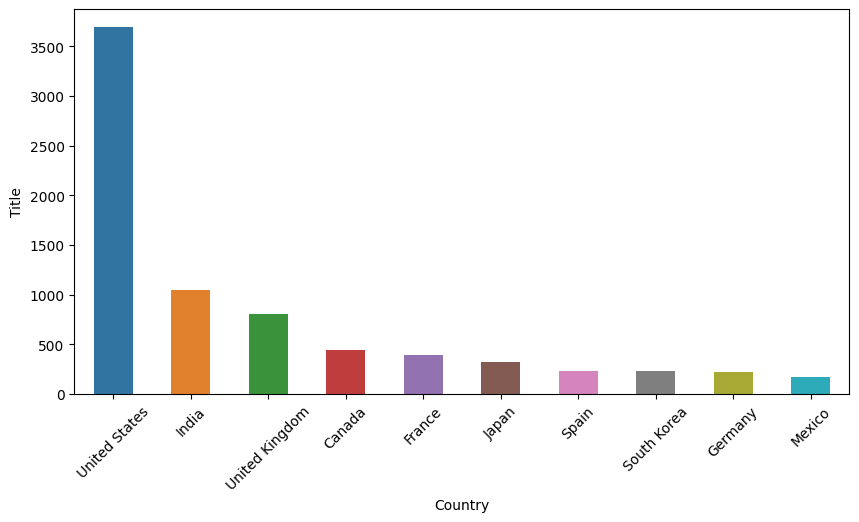

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=dfcdf2,x='Country',y='Title',width=0.5)
plt.xticks(rotation=45)
plt.show()

🎯 **Director**:

5120 Directors: Most of the Content is directed by 'Rajiv Chilaka' followed by 'Raul Campos' and 'Jan Suter' .

In [ ]:
finaldf['Director'].nunique()

5121

In [ ]:
dfd=finaldf.groupby('Director')['Title'].nunique().sort_values(ascending=False)
dfd

Director
Unknown                2634
Rajiv Chilaka            22
 Jan Suter               18
Raúl Campos              18
Marcus Raboy             16
                       ... 
J. Lee Thompson           1
J. Michael Long           1
 Songyos Sugmakanan       1
 Smriti Keshari           1
Joaquín Mazón             1
Name: Title, Length: 5121, dtype: int64

In [ ]:
# Top 10 Directors view
dfd2=finaldf.groupby('Director')['Title'].nunique().sort_values(ascending=False)[1:11]
dfd2

Director
Rajiv Chilaka          22
 Jan Suter             18
Raúl Campos            18
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Martin Scorsese        12
Youssef Chahine        12
Name: Title, dtype: int64

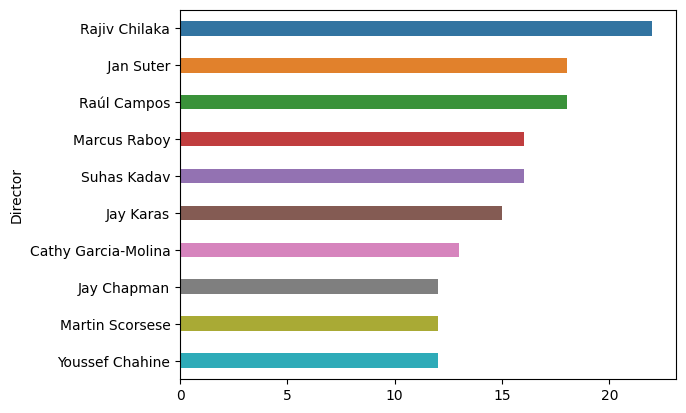

In [ ]:
sns.barplot(y=dfd2.index,x=dfd2.values,width=0.4)
plt.show()

🎯 **Cast**:

The Actor with maximum appearance on Netflix is 'Anupam Kher' followed by 'Rupa Bhimani' and 'Takahiro Sakurai'

In [ ]:
finaldf['Cast'].nunique()

39297

In [ ]:
# Considered top 5 from second position since the first position is 'Unknown Actor'.
dfct=finaldf.groupby('Cast')['Title'].nunique().sort_values(ascending=False).iloc[1:11]
dfct

Cast
 Anupam Kher         39
 Rupa Bhimani        31
 Takahiro Sakurai    30
 Julie Tejwani       28
 Om Puri             27
 Rajesh Kava         26
Shah Rukh Khan       26
 Boman Irani         25
 Paresh Rawal        25
 Yuki Kaji           25
Name: Title, dtype: int64

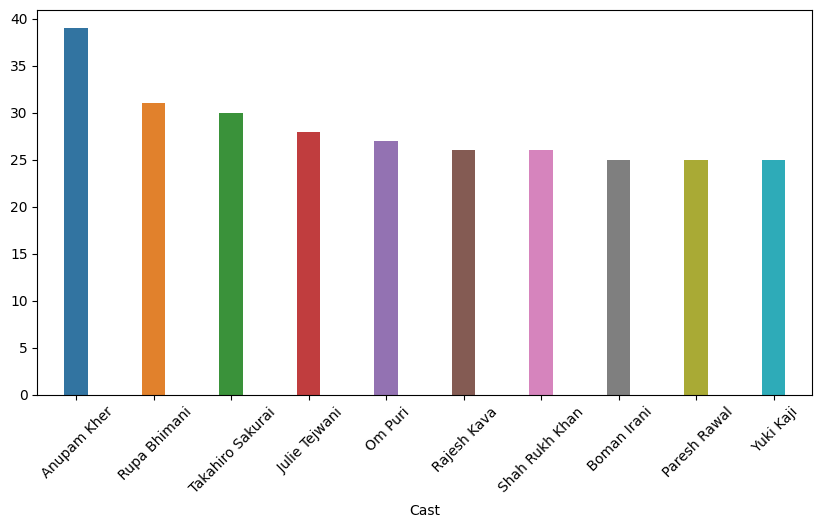

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=dfct.index,y=dfct.values,width=0.3)
plt.xticks(rotation=45)
plt.show()

🎯 **Duration**:

Average Movie Duration is 100 minutes. The range of Movie Duration goes from as low as 3 mins to 312 mins.

Average No. of Seasons for TV Shows is 2 Season

In [ ]:
data3=data2

In [ ]:
data3[['duration_number', 'duration_unit']] = data3['duration'].str.extract('(\d+) (\w+)')
data3['duration_number'] = pd.to_numeric(data3['duration_number'])

In [ ]:
mv=data3[data3['type']=='Movie']
tv=data3[data3['type']=='TV Show']

In [ ]:
mv['duration_number'].mean()

99.57250040776383

In [ ]:
mv['duration_number'].sort_values()

3777      3
2713      5
1484      8
1557      9
3535     10
       ... 
2484    233
2487    237
2491    253
717     273
4253    312
Name: duration_number, Length: 6131, dtype: int64

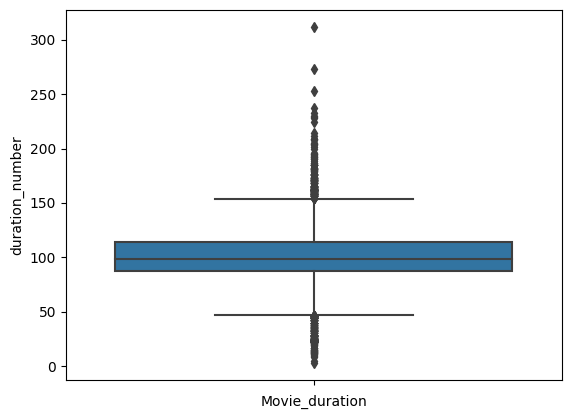

In [ ]:
# Clarly identify outliers of duration of movies from as low as 3 mins to 312 mins
sns.boxplot(data=mv,y='duration_number')
plt.xlabel('Movie_duration')
plt.show()

In [ ]:
tv['duration_number'].mean()

1.764947683109118

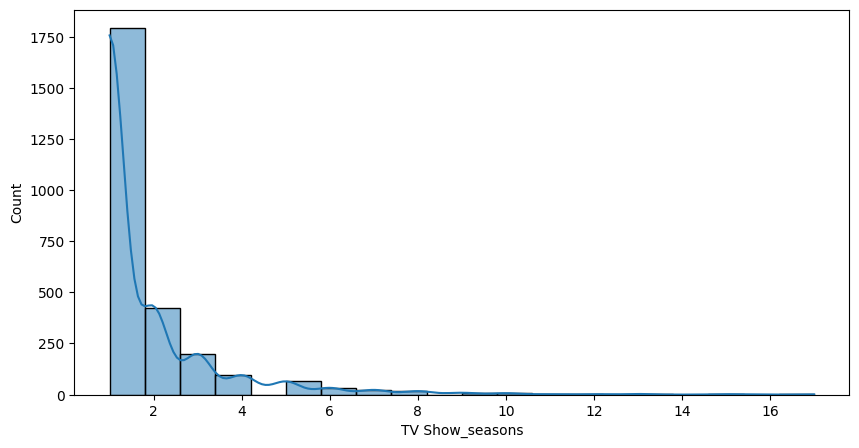

In [ ]:
# Histogram / Distplot to find TV Shows with maximum number of seasons
plt.figure(figsize=(10,5))
sns.histplot(data=tv,x='duration_number',bins=20,kde=True)
plt.xlabel('TV Show_seasons')
plt.show()

# Comparison of Movies vs TV Shows 🎯

Find the number of movies produced in each country and pick the top 10
countries.

Find the number of TV shows produced in each country and pick the top 10
countries.


In [ ]:
mdf=finaldf[finaldf['Type']=='Movie']
tdf=finaldf[finaldf['Type']=='TV Show']

In [ ]:
mdf1=mdf.groupby('Country')['Title'].nunique().sort_values(ascending=False)[:10]
tdf1=tdf.groupby('Country')['Title'].nunique().sort_values(ascending=False)[:10]


In [ ]:
mdf1 # display data

Country
United States     2751
India              962
United Kingdom     532
Unknown            440
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Name: Title, dtype: int64

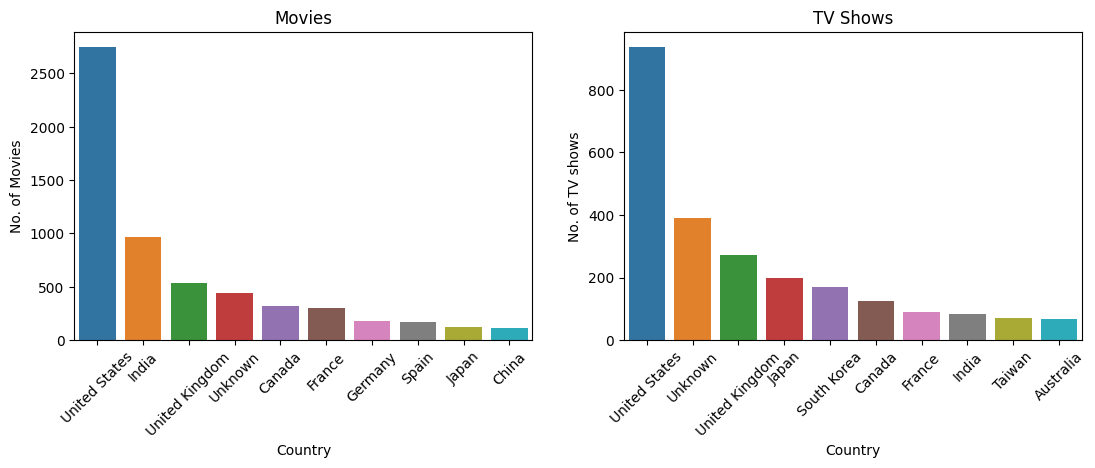

In [ ]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
plt.title('Movies')
sns.barplot(x=mdf1.index,y=mdf1.values)
plt.ylabel('No. of Movies')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('TV Shows')
sns.barplot(x=tdf1.index,y=tdf1.values)
plt.ylabel('No. of TV shows')
plt.xticks(rotation=45)
plt.show()



*Insights:*

1. USA top the list for the country to produce maximum movies and tv shows which can also reflect the business Netflix is getting from US.
2. India and UK lead the list of movies produced after US
3. UK and Japan lead the list of TV Shows produced after US

*Recommendations:*

1. Netflix can put more marketing efforts in other countries having potential to produce more content in local language and hence increasing customer base in that country.
2. Can put more efforts to collaborate with producers of potential countries to work out a profitable business case w.r.t to local turf.

# Best Time To Launch A Movie or TV show 🎯

Find which is the best week to release the Tv-show or the movie.

Find which is the best month to release the Tv-show or the movie.

In [ ]:
mdfl=mdf
tdfl=tdf

In [ ]:
mdfl['Month']=mdfl['Date_Added'].dt.strftime('%b')
tdfl['Month']=tdfl['Date_Added'].dt.strftime('%b')
mdfl['Week_of_Month'] = (mdfl['Date_Added'].dt.day - 1) // 7 + 1
tdfl['Week_of_Month'] = (tdfl['Date_Added'].dt.day - 1) // 7 + 1

<ipython-input-479-0991d72c47ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdfl['Month']=mdfl['Date_Added'].dt.strftime('%b')
<ipython-input-479-0991d72c47ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdfl['Month']=tdfl['Date_Added'].dt.strftime('%b')
<ipython-input-479-0991d72c47ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [ ]:
tdfl2=tdfl.groupby('Month')['Title'].nunique().sort_values(ascending=False)
tdfl2

Month
Dec    266
Jul    262
Sep    251
Aug    236
Jun    236
Oct    215
Apr    214
Mar    213
Nov    207
Jan    202
May    193
Feb    181
Name: Title, dtype: int64

In [ ]:
mdfl2=mdfl.groupby('Month')['Title'].nunique().sort_values(ascending=False)
mdfl2

Month
Jul    565
Apr    550
Dec    547
Jan    546
Oct    545
Mar    529
Aug    519
Sep    519
Nov    498
Jun    492
May    439
Feb    382
Name: Title, dtype: int64

In [ ]:
mdfl3=mdfl.groupby('Week_of_Month')['Title'].nunique().sort_values(ascending=False)
mdfl3

Week_of_Month
1    2584
3    1393
4     931
2     821
5     402
Name: Title, dtype: int64

In [ ]:
tdfl3=tdfl.groupby('Week_of_Month')['Title'].nunique().sort_values(ascending=False)
tdfl3

Week_of_Month
1    924
3    655
2    444
4    430
5    223
Name: Title, dtype: int64

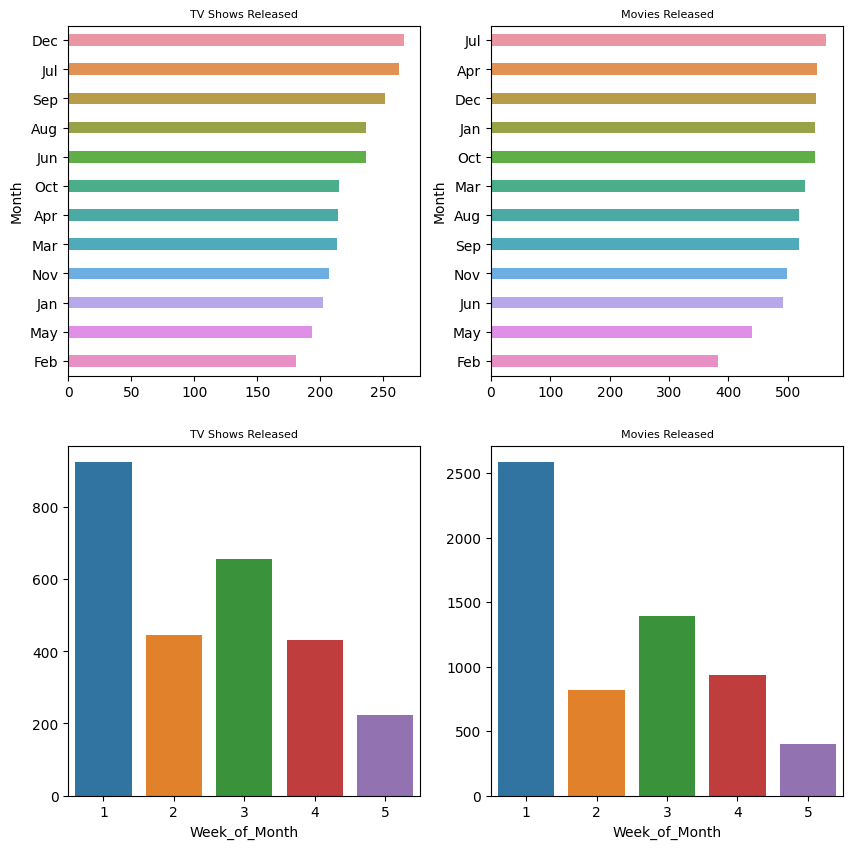

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.barplot(y=tdfl2.index,x=tdfl2.values,width=0.4)
plt.title('TV Shows Released',fontsize=8)

plt.subplot(2,2,3)
sns.barplot(x=tdfl3.index,y=tdfl3.values)
plt.title('TV Shows Released',fontsize=8)

plt.subplot(2,2,2)
sns.barplot(y=mdfl2.index,x=mdfl2.values,width=0.4)
plt.title('Movies Released',fontsize=8)

plt.subplot(2,2,4)
sns.barplot(x=mdfl3.index,y=mdfl3.values)
plt.title('Movies Released',fontsize=8)

plt.show()


*Insights:*

1. Most of the TV Shows got added on Netflix in the month of December, followed by July and September
2. Most of the Movies got added on Netflix in the month of July, closely followed by April, December, January and October
3. Maximum TV Shows got added in the 1st week of the month
4. Maximum Movies got added in the 1st week of the month
5. Minimum TV shows and Movies got released in the month of February.

*Recommendations:*

1. Data shows most of the movies and tv shows got released on netflix in 1st week of the month. One reason can be due general work pressure towards end of the month. It is recommended to release any new show or movie in the 1st week
2. It is recommended to release TV shows or Movies considering target audience of any country. for Ex. a big movie from India, better to keep its release date on the platform during some festival or holidays so as to get maximum viewership on the release.

# Popular Genres (Word Cloud) 🎯

Which genres are more popular or produced more

In [ ]:
dfg=finaldf

In [ ]:
genre_count=dfg.groupby("Listed_In")['Title'].nunique()

In [ ]:
from wordcloud import WordCloud

In [ ]:
genre_dict = genre_count.to_dict()

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_dict)

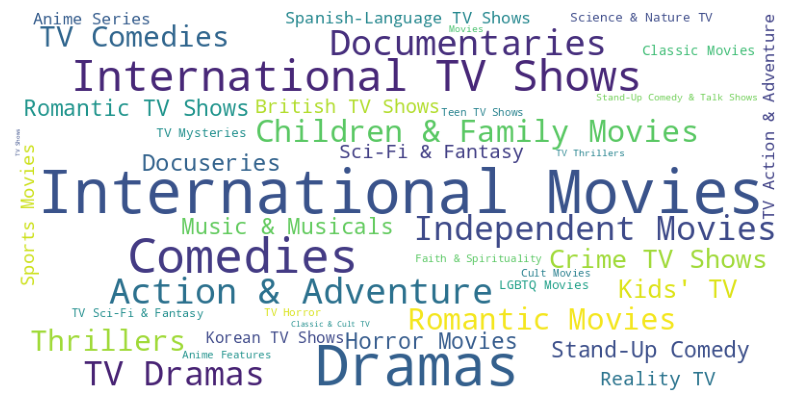

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

*Insights:*

Most Popular Genres are International Movies, Dramas and Comedies

*Recommendations:*

It is an important aspect to consider the kind of new shows or movies to launch so that viewers are hooked to Netflix and generate revenue



# Good Time To Add Movie In Platform After The Release 🎯

In [ ]:
tdfm=data2[data2['type']=='Movie']

In [ ]:
tdfm['release_year']=pd.to_datetime(tdfm['release_year'],format='%Y')

<ipython-input-493-155fc6ef7cf3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdfm['release_year']=pd.to_datetime(tdfm['release_year'],format='%Y')


In [ ]:
tdfm['Datediff']=(tdfm['Year of Content Added']-tdfm['Year of Release'])

<ipython-input-561-a8aa53edbe60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdfm['Datediff']=(tdfm['Year of Content Added']-tdfm['Year of Release'])


5394    -1
7063    -1
1806     0
7478     0
4625     0
        ..
8763    74
8660    74
8739    74
8205    75
7790    75
Name: Datediff, Length: 6131, dtype: int64

In [ ]:
tdfm['Datediff'].mode()

0    0
Name: Datediff, dtype: int64

In [ ]:
heatmap_data = tdfm.pivot_table(values='Datediff', index='Year of Release', columns='Year of Content Added')


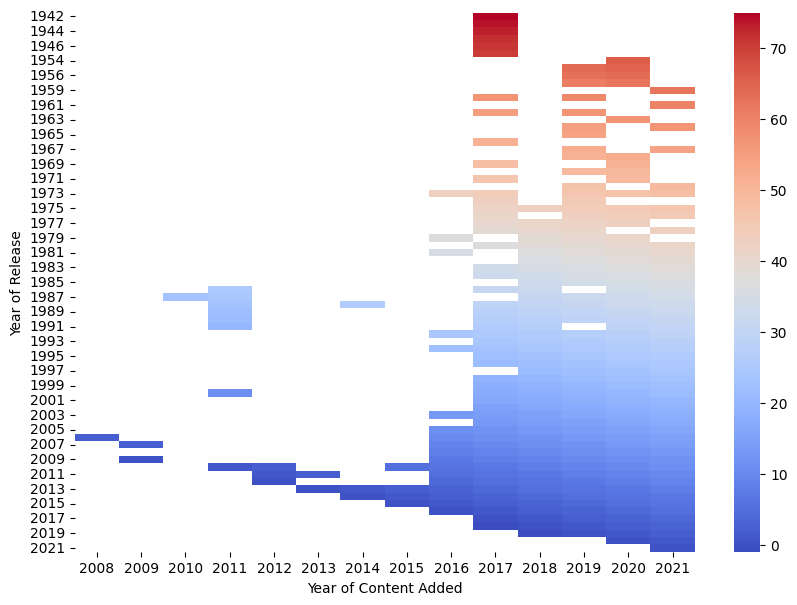

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(heatmap_data, cmap='coolwarm', fmt='.0f', cbar=True)
plt.xticks()
plt.show()

*Insights:*

It is observed clearly with the help of the heatmap that in 2021 most of the movies got added to platform within a year.


*Recommendations:*

It is recommended that the movie is added to the platform within the referred timeline so that new content is available as early as possible which will keep customer hooked to the platform and help increase revenue



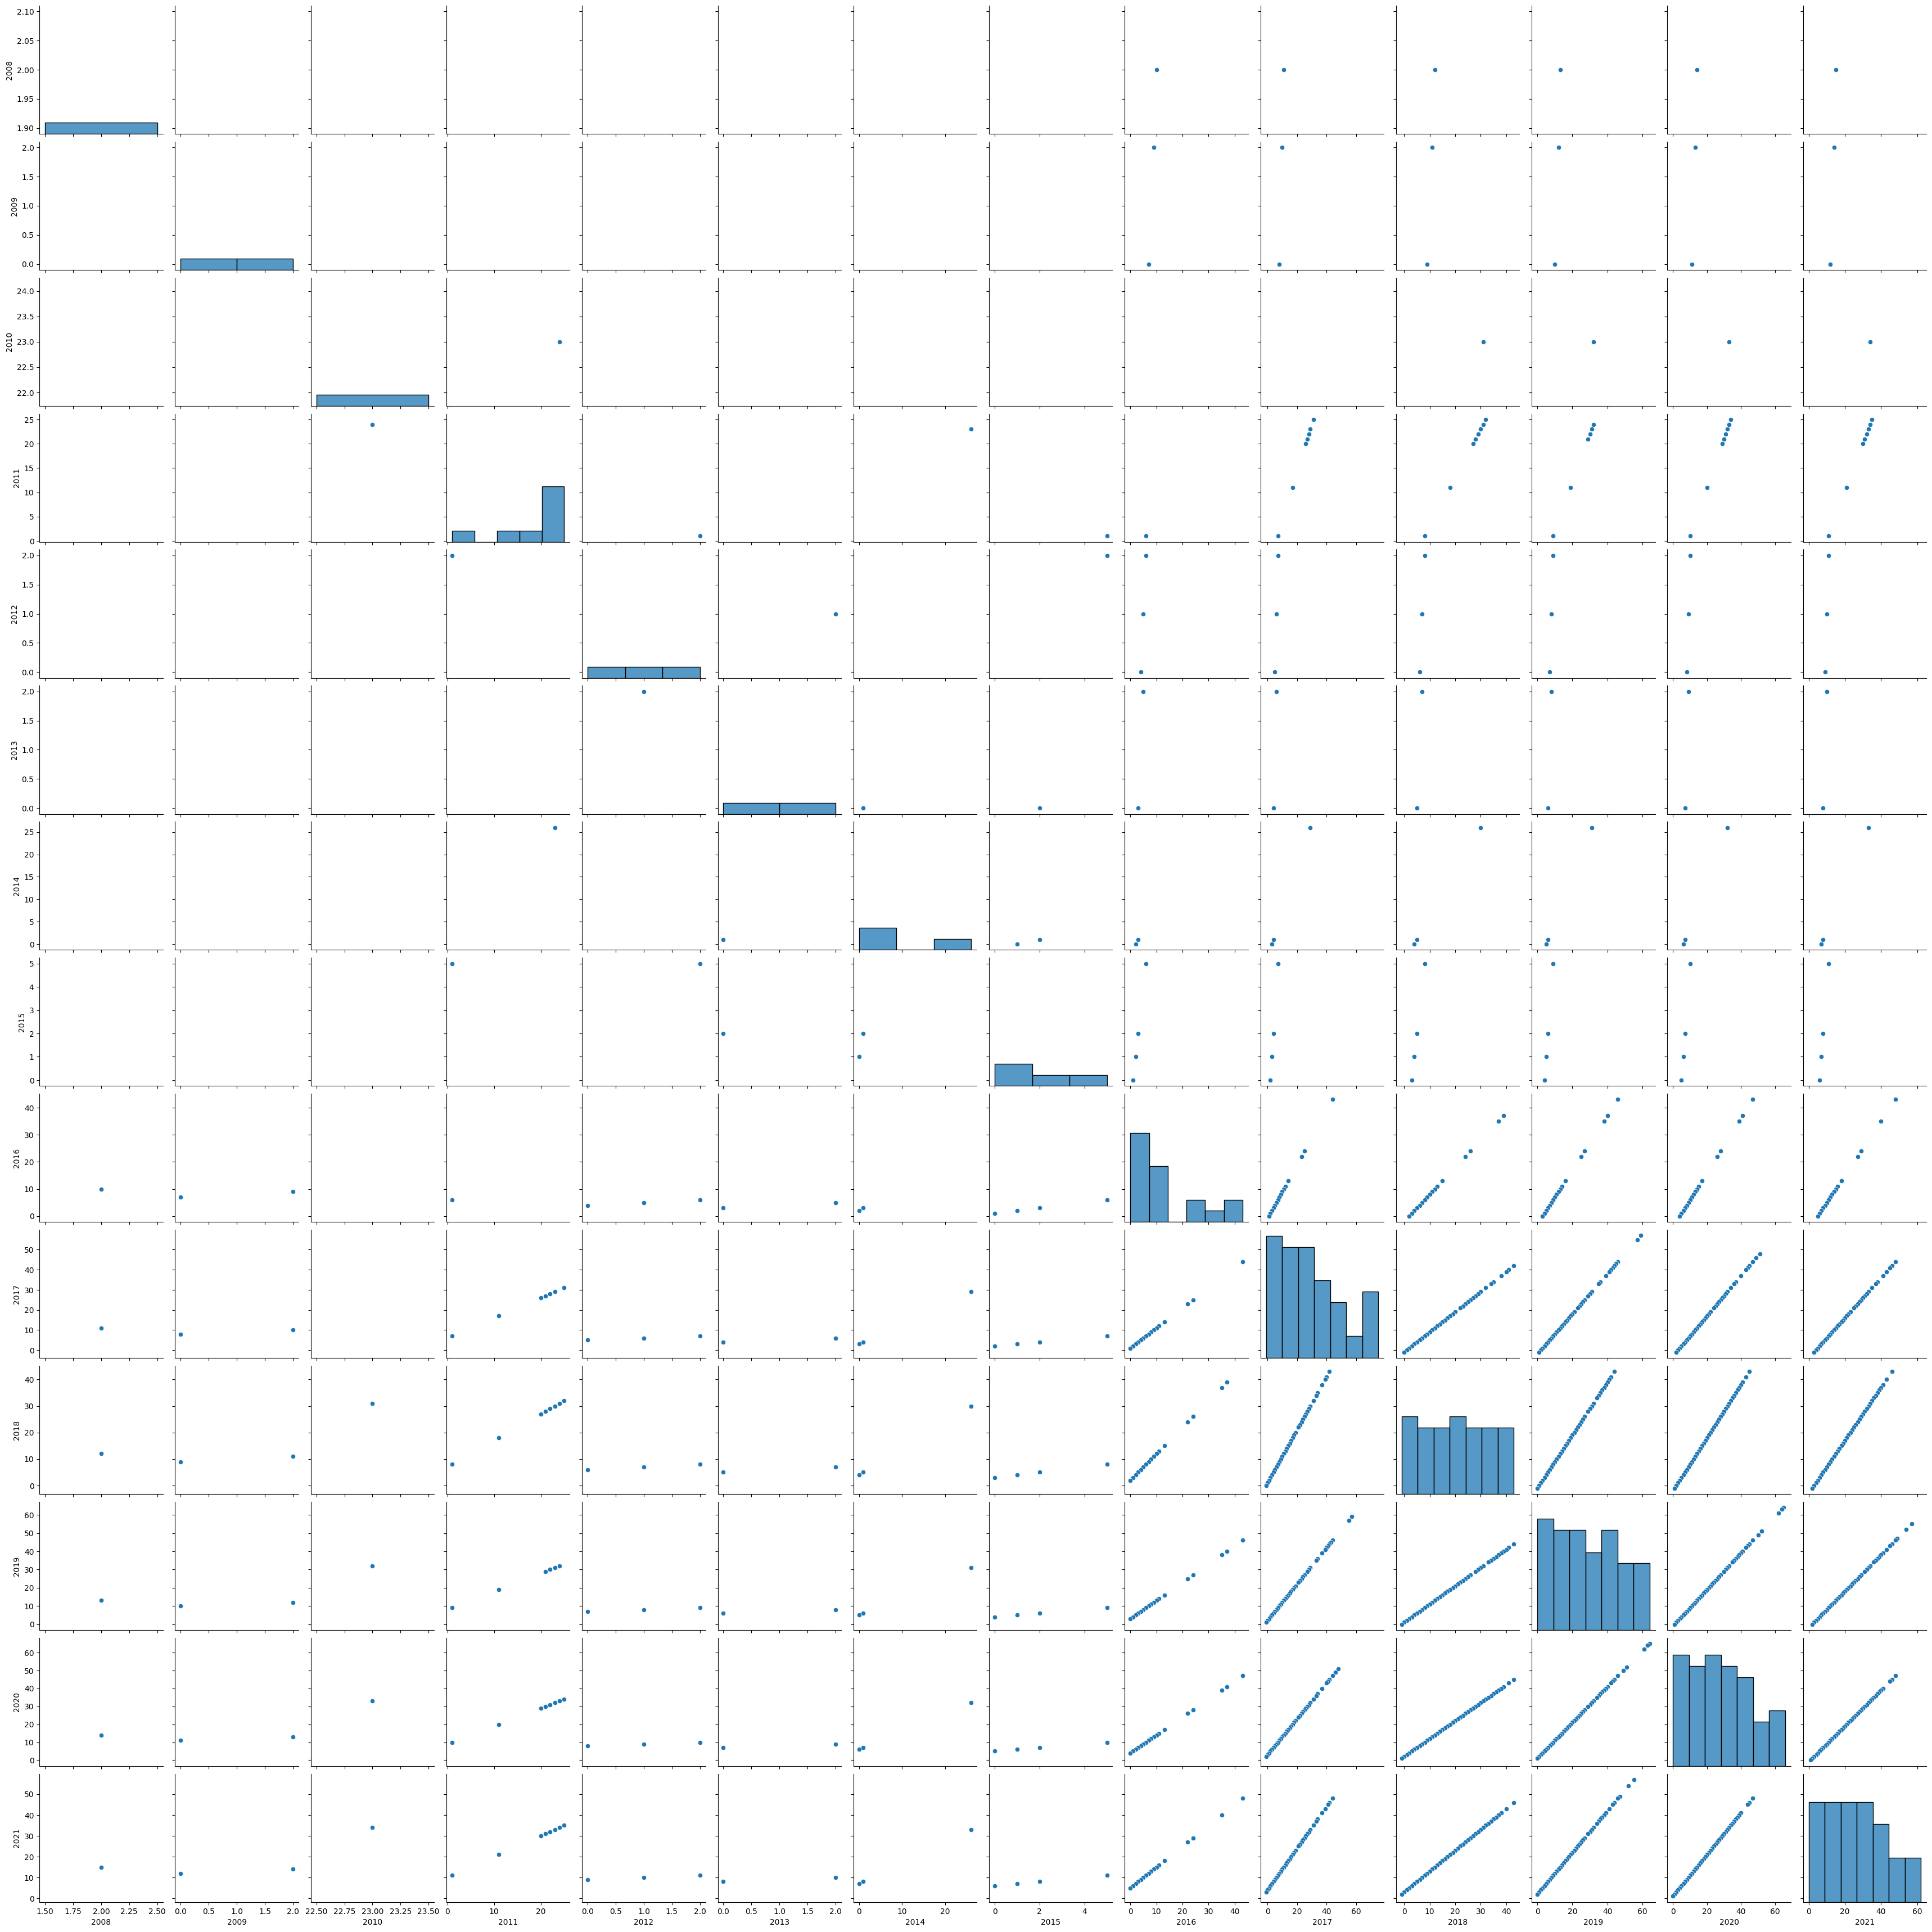

In [ ]:
sns.pairplot(heatmap_data)

# Best Actor / Director Pair 🎯

Which Actor / Director Pair appeared in most of the content on Netflix

In [ ]:
finaldf.groupby(['Cast','Director'])['Title'].nunique().sort_values(ascending=False)

Cast               Director      
Unknown Actor      Unknown           352
 Takahiro Sakurai  Unknown            23
 Rajesh Kava       Rajiv Chilaka      19
 Julie Tejwani     Rajiv Chilaka      19
 Jigna Bhardwaj    Rajiv Chilaka      18
                                    ... 
 Jason Sudeikis     Will Graham        1
                   Andy Tennant        1
                   Garry Marshall      1
                   Kevin R. Adams      1
Ṣọpẹ́ Dìrísù       Remi Weekes         1
Name: Title, Length: 63810, dtype: int64

In [ ]:
dap= finaldf.groupby(['Cast','Director'])['Title'].nunique().sort_values(ascending=False)[1:11]
dap=dap.reset_index()
dap['Cast_Director'] = dap['Cast'] + " - " + dap['Director']
dap


,Cast,Director,Title,Cast_Director
0,Takahiro Sakurai,Unknown,23,Takahiro Sakurai - Unknown
1,Rajesh Kava,Rajiv Chilaka,19,Rajesh Kava - Rajiv Chilaka
2,Julie Tejwani,Rajiv Chilaka,19,Julie Tejwani - Rajiv Chilaka
3,Jigna Bhardwaj,Rajiv Chilaka,18,Jigna Bhardwaj - Rajiv Chilaka
4,Rupa Bhimani,Rajiv Chilaka,18,Rupa Bhimani - Rajiv Chilaka
5,Junichi Suwabe,Unknown,16,Junichi Suwabe - Unknown
6,Yuki Kaji,Unknown,16,Yuki Kaji - Unknown
7,Vatsal Dubey,Rajiv Chilaka,16,Vatsal Dubey - Rajiv Chilaka
8,Fortune Feimster,Unknown,16,Fortune Feimster - Unknown
9,David Attenborough,Unknown,15,David Attenborough - Unknown


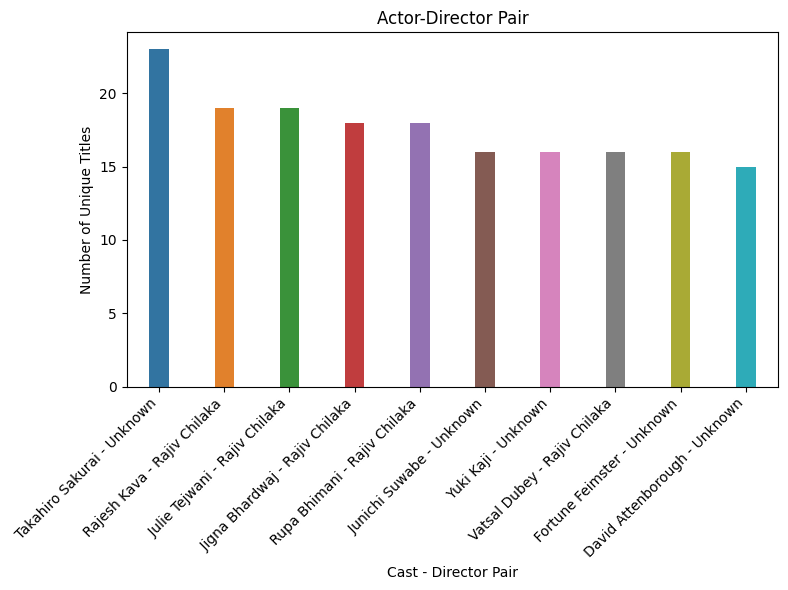

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=dap, x='Cast_Director', y='Title',width=0.3)
plt.xticks(rotation=45, ha='right')

plt.xlabel("Cast - Director Pair")
plt.ylabel("Number of Unique Titles")
plt.title("Actor-Director Pair")

plt.tight_layout()
plt.show()


*Insights:*

This analysis gives an insight of such pairs which are most successful in terms of number of projects with Netflix.

Unknown category is observed and not removed to display the real scenario, further inferences can be drawn henceforth.
It is clearly observed that the pair 'Rajesh Kava' and 'Rajiv Chilaka' appeared the most on Netflix Platform.

*Recommendations:*

It is recommended that such pairs or other potential pairs are preferred to create more content which is largely accepted by target audience and help Netflix earn loyalty of viewers and generate revenue for Netflix gradually.




# Pair Plot of Movies Data & TV Shows Data

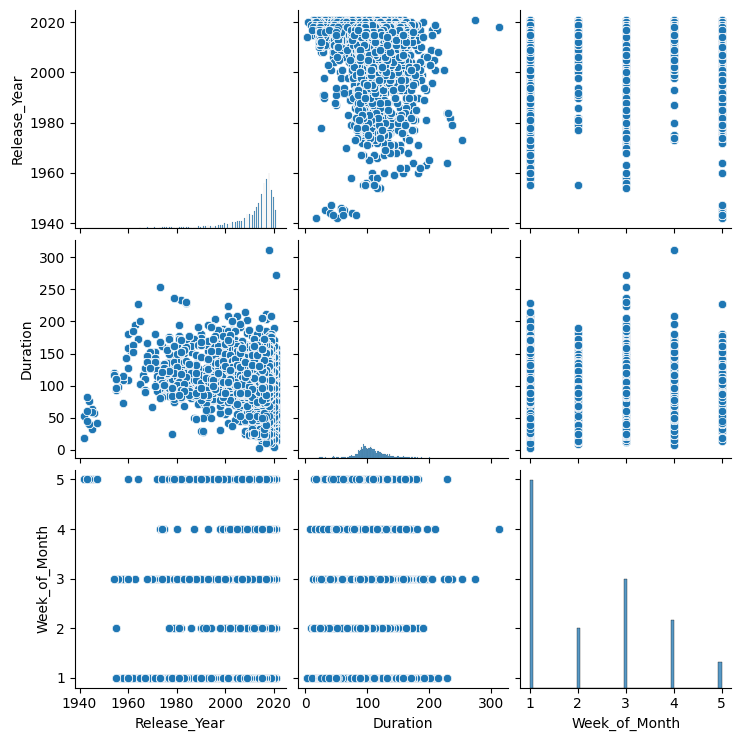

In [ ]:
#Pairplot of Movies Data displays the correlation between numerical columns of the data
sns.pairplot(mdf)

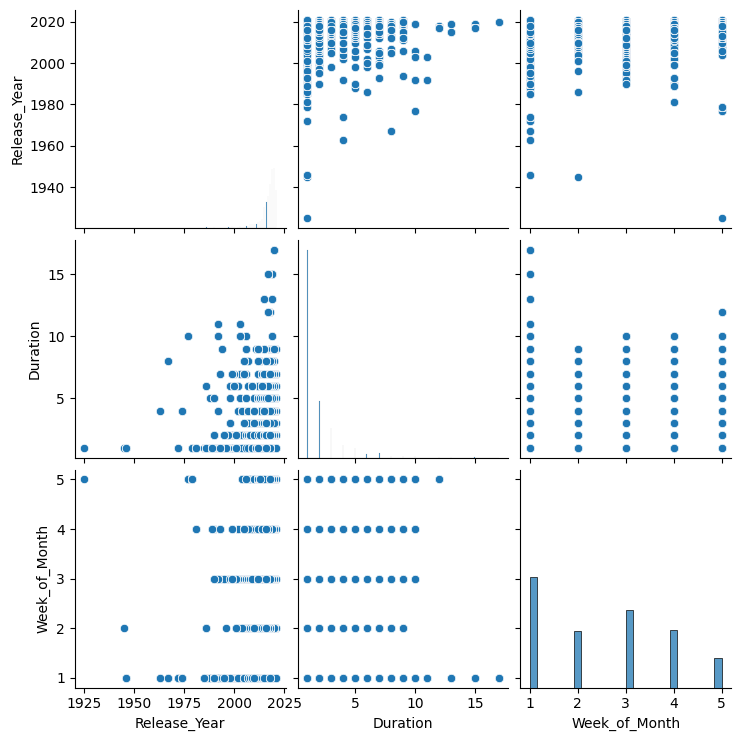

In [ ]:
# Pairplot of TV Shows data displays correlation between numercial columns of the data
sns.pairplot(tdf)

# Recommendations:

*   There are potential Countries from content and revenue point of view, which need attention
*   Getting relevant content will be the key to revenue. Above analysis shares the kind of content to be launched and how to push potential markets and countries for the same by collaborating with local producers
*   Shared Insights and Recommendations would definitely help in setting Go To Market Strategy and Time to Market of each content.   



